In [39]:
from final_model_log_scale import WAE, AudioDataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa as li
from IPython.display import Audio
from util import audio_utilities as au

In [80]:
def get_oct_semi(f0):
    f = 27.5*2**(np.arange(84)/12)
    idx = np.argmin(abs(f-f0))
    octave = torch.zeros([7])
    semi   = torch.zeros([12])
    octave[idx//12] = 1
    semi[idx%12] = 1
    return octave.unsqueeze(0) ,semi.unsqueeze(0)

In [81]:
torch.nn.Module.dump_patches = False

model,log = torch.load("../pretrained/uku_reg_cond_3200_epoch_zdim_4.pt", map_location="cpu")
model.eval()

motu = AudioDataset("../notebooks/motu/motu_dataset/*.wav", slice_size=128, process=0)

print("Done!")

Done!


/home/antoine/lap/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'final_model_log_scale.WAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


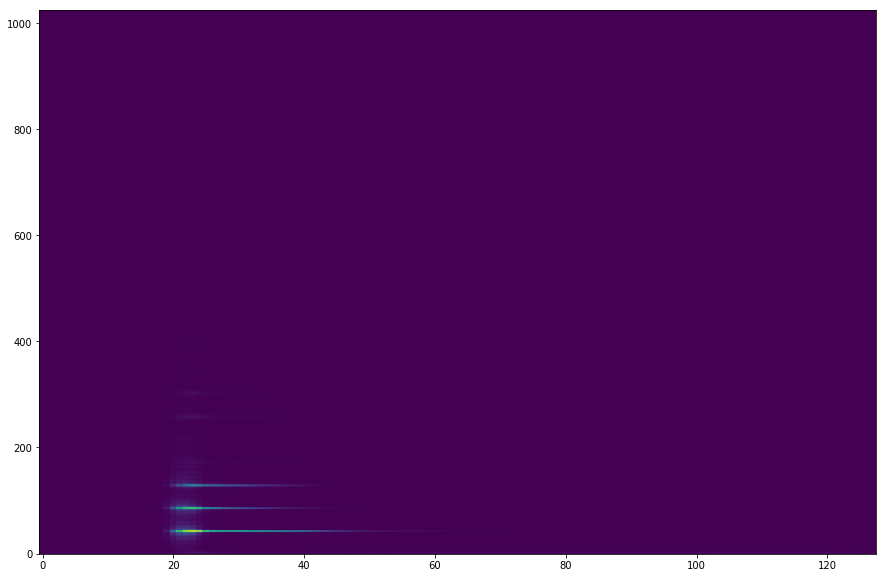

In [84]:
idx = 13

model.forward = model.sample

z = model.encode(motu[idx][0].unsqueeze(0))

o,s = motu[idx][1].unsqueeze(0) , motu[idx][2].unsqueeze(0)

S = model(z, o, s).detach().cpu().numpy()

plt.figure(figsize=(15,10))
plt.imshow(S, origin="lower", aspect="auto")

In [85]:
Audio(au.reconstruct_signal_griffin_lim(S.T, 2048, 256, 300), rate=22050)

In [79]:
traced_model = torch.jit.trace(model, [x, o, s])
traced_model.save("uku_log_reg_500.pt")

/home/antoine/dev/serge/src/final_model_log_scale.py:203: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mel = torch.from_numpy(li.filters.mel(22050, 2048, n_mels=500)).float()
